In [1]:
import pandas as pd
df = pd.read_csv('House_Rent_Dataset.csv')
X = df[['Size']].values
y = df['Rent'].values.reshape(-1,1)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_n = scaler.fit_transform(X)
model = LinearRegression()

model.fit(X_n, y)

Y_pred = model.predict(X_n)

data = np.array([[1100],[800]])
data_n = scaler.fit_transform(data)


predictions = model.predict(data_n)
predictions


array([[67291.01447323],
       [ 2695.88818164]])

In [3]:
from sklearn.metrics import r2_score
r2 = r2_score(y, Y_pred)
print("R2 score:", r2)

R2 score: 0.17102422962807484


In [4]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[32297.56314579]]
Intercept: [34993.45132743]


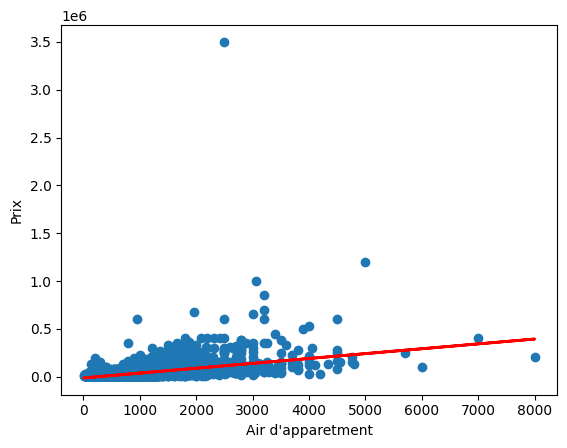

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.xlabel('Air d\'apparetment')
plt.ylabel('Prix')
plt.show()

In [6]:
adjusted_r2_1 = 1 - (1 - r2) * (len(X) - 1) / (len(X) - X.shape[1] - 1)
df['Furnishing Status'] = df['Furnishing Status'].apply(lambda x: 2 if x.lower() == 'furnished' else (1 if x.lower() == 'semi-furnished' else 0))
X = df[['Size','Furnishing Status']].values
y = df['Rent'].values.reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_n = scaler.fit_transform(X)
model = LinearRegression()

model.fit(X_n, y)

Y_pred = model.predict(X_n)

from sklearn.metrics import r2_score
r2 = r2_score(y, Y_pred)
print("R2 score:", r2)
adjusted_r2_2 = 1 - (1 - r2) * (len(X) - 1) / (len(X) - X.shape[1] - 1)
print("R2:1 - " + str(adjusted_r2_1))
print("R2:2 - " + str(adjusted_r2_2))


R2 score: 0.17679091690682625
R2:1 - 0.1708494876865968
R2:2 - 0.1764437910020853


In [ ]:
#### R2adj_1 < R2adj_2 x significatif Furnishing status are significatif 